In [1]:
import sys
sys.path.insert(0, '..')
%load_ext autoreload
%autoreload 2
%aimport std_func

# Hide warnings
import warnings
warnings.filterwarnings("ignore")

## N-grams Embeddings - Cosine Similarity Analysis
Next, we look into cosine similarity distances to measure the descripiton similarity between companies. In this notebook, we simply use n-grams embeddings for consine similarity analysis. 

Cosine similarity measures the similarity between two vectors of an inner product space. In text analysis, a document can be represented by its elements (words) and the frequency of each element. Comparing the frequency of words in different documents, which is the company description for companies in our case, would generate cosine similarity distance between documents. Each description generates a vector containing the frequency of each word. It measures the similarity between these companies in terms of their business description.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../data/preprocessed.csv', 
                usecols = ['reportingDate', 'name', 
                           'coDescription_stopwords', 'SIC', 'SIC_desc'])

### Cosine Similarity Analysis

#### Words Counting
For this cosine similarity analysis, we generate sequences of 2 to 4 words as one term and only select the top 600 terms by frequency.

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

Vectorizer = CountVectorizer(ngram_range = (2,4), 
                             max_features = 600)

count_data = Vectorizer.fit_transform(df['coDescription_stopwords'])

In [5]:
wordsCount = pd.DataFrame(count_data.toarray(),columns=Vectorizer.get_feature_names())
wordsCount = wordsCount.set_index(df['name'])

/Users/lulu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Here is the n-grams embedding matrix with the 600 2-to-4 grams as columns and the 675 companies as rows.

In [6]:
wordsCount

ability make  \
name                                                             
MONGODB, INC.                                                0   
SALESFORCE COM INC                                           0   
SPLUNK INC                                                   0   
OKTA, INC.                                                   0   
VEEVA SYSTEMS INC                                            0   
...                                                        ...   
AMERICAN REALTY CAPITAL NEW YORK CITY REIT, INC.             0   
CYCLACEL PHARMACEUTICALS, INC.                               0   
ZOETIS INC.                                                  0   
STAG INDUSTRIAL, INC.                                        0   
EQUINIX INC                                                  0   

                                                  accounting standard  \
name                                                                    
MONGODB, INC.                                                       0   
SALESFORCE COM INC                                                  0   
SPLUNK INC                                                          0   
OKTA, INC.                                                          0   
VEEVA SYSTEMS INC                                                  12   
...                                                               ...   
AMERICAN REALTY CAPITAL NEW YORK CITY REIT, INC.                    0   
CYCLACEL PHARMACEUTICALS, INC.                                      0   
ZOETIS INC.                                                        17   
STAG INDUSTRIAL, INC.                                               0   
EQUINIX INC                                                         0   

                                                  acquire property  act act  \
name                                                                          
MONGODB, INC.                                                    0        0   
SALESFORCE COM INC                                               0        0   
SPLUNK INC                                                       0        0   
OKTA, INC.                                                       0        0   
VEEVA SYSTEMS INC                                                0        1   
...                                                            ...      ...   
AMERICAN REALTY CAPITAL NEW YORK CITY REIT, INC.                 1        0   
CYCLACEL PHARMACEUTICALS, INC.                                   0        0   
ZOETIS INC.                                                      0        0   
STAG INDUSTRIAL, INC.                                            1        0   
EQUINIX INC                                                      0        0   

                                                  act amended  \
name                                                            
MONGODB, INC.                                               0   
SALESFORCE COM INC                                          0   
SPLUNK INC                                                  1   
OKTA, INC.                                                  0   
VEEVA SYSTEMS INC                                           4   
...                                                       ...   
AMERICAN REALTY CAPITAL NEW YORK CITY REIT, INC.            0   
CYCLACEL PHARMACEUTICALS, INC.                              0   
ZOETIS INC.                                                 0   
STAG INDUSTRIAL, INC.                                       1   
EQUINIX INC                                                 2   

                                                  additional information  \
name                                                                       
MONGODB, INC.                                                          0   
SALESFORCE COM INC                                                     0   
SPLUNK INC                                                     

#### Cosine Similarity Computation
Now we take in the 2-to-4 grams embeddings to analyze the text similarity. 

In [7]:
# Compute Cosine Similarity
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = pd.DataFrame(cosine_similarity(wordsCount, wordsCount))
cosine_sim = cosine_sim.set_index(df['name'])
cosine_sim.columns = df['name']

The description similarity between companies range from 0 to 1. The higher the cosine similarity score, the more similar they are. 

In [8]:
cosine_sim

name                                              MONGODB, INC.  \
name                                                              
MONGODB, INC.                                          1.000000   
SALESFORCE COM INC                                     0.445455   
SPLUNK INC                                             0.610272   
OKTA, INC.                                             0.620961   
VEEVA SYSTEMS INC                                      0.500762   
...                                                         ...   
AMERICAN REALTY CAPITAL NEW YORK CITY REIT, INC.       0.135839   
CYCLACEL PHARMACEUTICALS, INC.                         0.144678   
ZOETIS INC.                                            0.189609   
STAG INDUSTRIAL, INC.                                  0.178397   
EQUINIX INC                                            0.102958   

name                                              SALESFORCE COM INC  \
name                                                                   
MONGODB, INC.                                               0.445455   
SALESFORCE COM INC                                          1.000000   
SPLUNK INC                                                  0.635969   
OKTA, INC.                                                  0.455189   
VEEVA SYSTEMS INC                                           0.196053   
...                                                              ...   
AMERICAN REALTY CAPITAL NEW YORK CITY REIT, INC.            0.201230   
CYCLACEL PHARMACEUTICALS, INC.                              0.145089   
ZOETIS INC.                                                 0.075038   
STAG INDUSTRIAL, INC.                                       0.277952   
EQUINIX INC                                                 0.354856   

name                                              SPLUNK INC  OKTA, INC.  \
name                                                                       
MONGODB, INC.                                       0.610272    0.620961   
SALESFORCE COM INC                                  0.635969    0.455189   
SPLUNK INC                                          1.000000    0.665648   
OKTA, INC.                                          0.665648    1.000000   
VEEVA SYSTEMS INC                                   0.274023    0.195672   
...                                                      ...         ...   
AMERICAN REALTY CAPITAL NEW YORK CITY REIT, INC.    0.142041    0.144051   
CYCLACEL PHARMACEUTICALS, INC.                      0.128467    0.170361   
ZOETIS INC.                                         0.136418    0.111937   
STAG INDUSTRIAL, INC.                               0.194072    0.163588   
EQUINIX INC                                         0.273502    0.074624   

name                                              VEEVA SYSTEMS INC  \
name                                                                  
MONGODB, INC.                                              0.500762   
SALESFORCE COM INC                                         0.196053   
SPLUNK INC                                                 0.274023   
OKTA, INC.                                                 0.195672   
VEEVA SYSTEMS INC                                          1.000000   
...                                                             ...   
AMERICAN REALTY CAPITAL NEW YORK CITY REIT, INC.           0.211695   
CYCLACEL PHARMACEUTICALS, INC.                             0.060273   
ZOETIS INC.                                                0.501041   
STAG INDUSTRIAL, INC.                                      0.332207   
EQUINIX INC                                                0.064207   

name                                              AUTODESK INC  \
name                                                             
MONGODB, INC.                                         0.338268   
SALESFORCE COM INC                                    0.418546   
SPLUNK INC    

### Performance Evaluation
#### Predictions Based on the Closest Cosine Similarity Distance
We use the closest neighborhood in terms of cosine similarity distances to evaluate the accuracy of the SIC classfication generated using 2-to-4 grams embeddings and cosine similarity distances.

In [10]:
prediction, accuracy, cm = std_func.get_accuracy(cosine_sim, df)

y_true  \
0    Prepackaged Software (mass reproduction of sof...   
1    Prepackaged Software (mass reproduction of sof...   
2    Prepackaged Software (mass reproduction of sof...   
3    Prepackaged Software (mass reproduction of sof...   
4    Prepackaged Software (mass reproduction of sof...   
..                                                 ...   
670                      Real Estate Investment Trusts   
671                        Pharmaceutical Preparations   
672                        Pharmaceutical Preparations   
673                      Real Estate Investment Trusts   
674                      Real Estate Investment Trusts   

                                                y_pred  
0    Prepackaged Software (mass reproduction of sof...  
1    Prepackaged Software (mass reproduction of sof...  
2    Prepackaged Software (mass reproduction of sof...  
3    Prepackaged Software (mass reproduction of sof...  
4    Prepackaged Software (mass reproduction of sof...  
..                                                 ...  
670                      Real Estate Investment Trusts  
671                        Pharmaceutical Preparations  
672  Prepackaged Software (mass reproduction of sof...  
673                      Real Estate Investment Trusts  
674                      Real Estate Investment Trusts  

[675 rows x 2 columns]

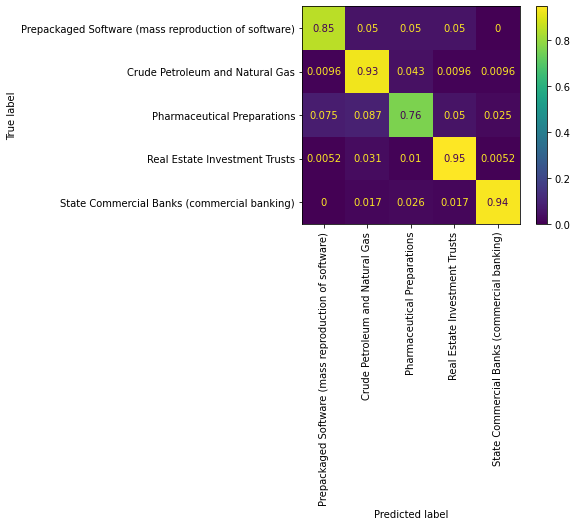

In [11]:
cosine_sim_conf = std_func.conf_mat_cosine(cosine_sim, df)
cosine_sim_conf

We can see from the above confusion matrix that cosine similarity analysis on 2-to-4 grams embeddings give an accuray of 89% on average. For industries `Crude Petroleum and Natural Gas`, `Real Estate Investment Trusts` and `State Commercial Banks (commercial banking)`, the accuracy is above 90%. `Pharmaceutical Preparations` gives the lowest accuracy at 76%.

### Plotting

#### Plotting on the Cosine Similarity Matrix
We use PCA to automatically perform dimensionality reduction. First, we have a 2-D plot on cosine similarity matrix.

In [12]:
plot_cos = std_func.pca_visualize_2d(cosine_sim, df.loc[:,["name","SIC_desc"]])

Here we have a 3-D plot with the first three dimensions which maximize the most variance.

In [13]:
std_func.pca_visualize_3d(plot_cos)

We can see from the above 3D plot that three industries are clustered well spread, especially state commercial banks. However, prepackaged software industry is closely clustered with the others.

We can look at the explained variance of each dimension the PCA embedding of our cosine similatiry matrix produced below:

In [19]:
plot_cos[0].explained_variance_ratio_

array([0.20406624, 0.15037398, 0.12498635, 0.08973691, 0.04622542,
       0.0342809 , 0.02719763, 0.02207423, 0.01706045, 0.01662953])

The total explained variance of the first three dimensions are:

In [20]:
plot_cos[0].explained_variance_ratio_[0:3].sum()

0.47942656790299754

The first three dimensions explained 79% of the total variance that exists within the data.

### Conclusion Reporting

In [16]:
from sklearn.metrics import classification_report
print(classification_report(prediction["y_true"], prediction["y_pred"], target_names=df["SIC_desc"].unique()))

                                                      precision    recall  f1-score   support

Prepackaged Software (mass reproduction of software)       0.88      0.85      0.87        80
                     Crude Petroleum and Natural Gas       0.91      0.93      0.92       208
                         Pharmaceutical Preparations       0.77      0.76      0.77        80
                       Real Estate Investment Trusts       0.94      0.95      0.94       191
         State Commercial Banks (commercial banking)       0.96      0.94      0.95       116

                                            accuracy                           0.91       675
                                           macro avg       0.89      0.89      0.89       675
                                        weighted avg       0.91      0.91      0.91       675



We can see from the above classification_report, we can conclude that cosine similarity analysis on 2-to-4 grams embeddings gives a good result on SIC classfication, specifically on the industries `Crude Petroleum and Natural Gas`, `Real Estate Investment Trusts` and `State Commercial Banks (commercial banking)`.